Importing necesarry libarary

In [ ]:
!pip install ucimlrepo

In [ ]:

from ucimlrepo import fetch_ucirepo, list_available_datasets
import ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
list_available_datasets(search='Bre')

------------------------------------------------------------
The following datasets are available for search query "bre":
------------------------------------------------------------
Dataset Name                            ID    
------------                            --    
Breast Cancer                           14    
Breast Cancer Wisconsin (Original)      15    
Breast Cancer Wisconsin (Prognostic)    16    
Breast Cancer Wisconsin (Diagnostic)    17    
Diabetic Retinopathy Debrecen           329   
Breast Cancer Coimbra                   451   



In [ ]:
cancer = fetch_ucirepo(id=15)
cancer.data.original

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [ ]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [ ]:
#Shape of the Dataset
df.shape


(699, 11)

Data pre-processing

In [ ]:
df.drop(['id'],axis=1,inplace = True)

In [ ]:
df.columns

Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clump_thickness         699 non-null    int64 
 1   uniform_cell_size       699 non-null    int64 
 2   uniform_cell_shape      699 non-null    int64 
 3   marginal_adhesion       699 non-null    int64 
 4   single_epithelial_size  699 non-null    int64 
 5   bare_nuclei             699 non-null    object
 6   bland_chromatin         699 non-null    int64 
 7   normal_nucleoli         699 non-null    int64 
 8   mitoses                 699 non-null    int64 
 9   class                   699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
#Diagnosis class Malignant = 4 and Benign = 2
#The number of Benign and Maglinant cases from the dataset
df['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

In [ ]:
df['bare_nuclei'].value_counts()

bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [ ]:
df[df['bare_nuclei'] == '?']

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [ ]:
df[df['bare_nuclei'] == '?'].sum()

clump_thickness                         54
uniform_cell_size                       39
uniform_cell_shape                      46
marginal_adhesion                       29
single_epithelial_size                  39
bare_nuclei               ????????????????
bland_chromatin                         50
normal_nucleoli                         44
mitoses                                 16
class                                   36
dtype: object

In [ ]:
df.replace('?',np.nan,inplace=True)

In [ ]:
df['bare_nuclei'][23]

nan

In [ ]:
df.isna().sum()

clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df.isna().sum()

clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   clump_thickness         699 non-null    int64
 1   uniform_cell_size       699 non-null    int64
 2   uniform_cell_shape      699 non-null    int64
 3   marginal_adhesion       699 non-null    int64
 4   single_epithelial_size  699 non-null    int64
 5   bare_nuclei             699 non-null    int64
 6   bland_chromatin         699 non-null    int64
 7   normal_nucleoli         699 non-null    int64
 8   mitoses                 699 non-null    int64
 9   class                   699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [ ]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.529328,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.635260,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Bivariate Data Analysis

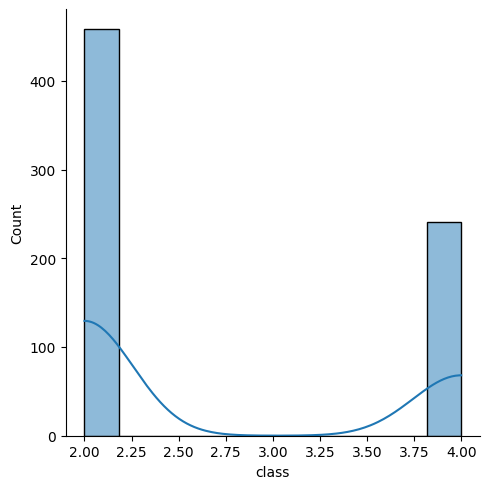

In [ ]:
import seaborn as sns

sns.displot(df['class'],kde=True)

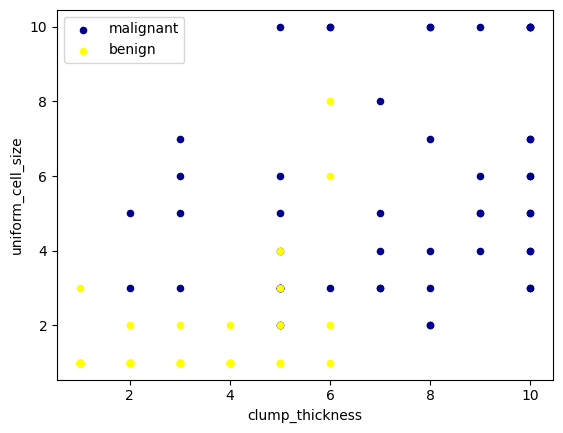

In [ ]:
ax = df[df['class'] == 4][0:50].plot(kind='scatter', x='clump_thickness', y='uniform_cell_size', color='DarkBlue', label='malignant');
df[df['class'] == 2][0:50].plot(kind='scatter', x='clump_thickness', y='uniform_cell_size', color='Yellow', label='benign', ax=ax);
plt.show()

Multivariate Data Analysis

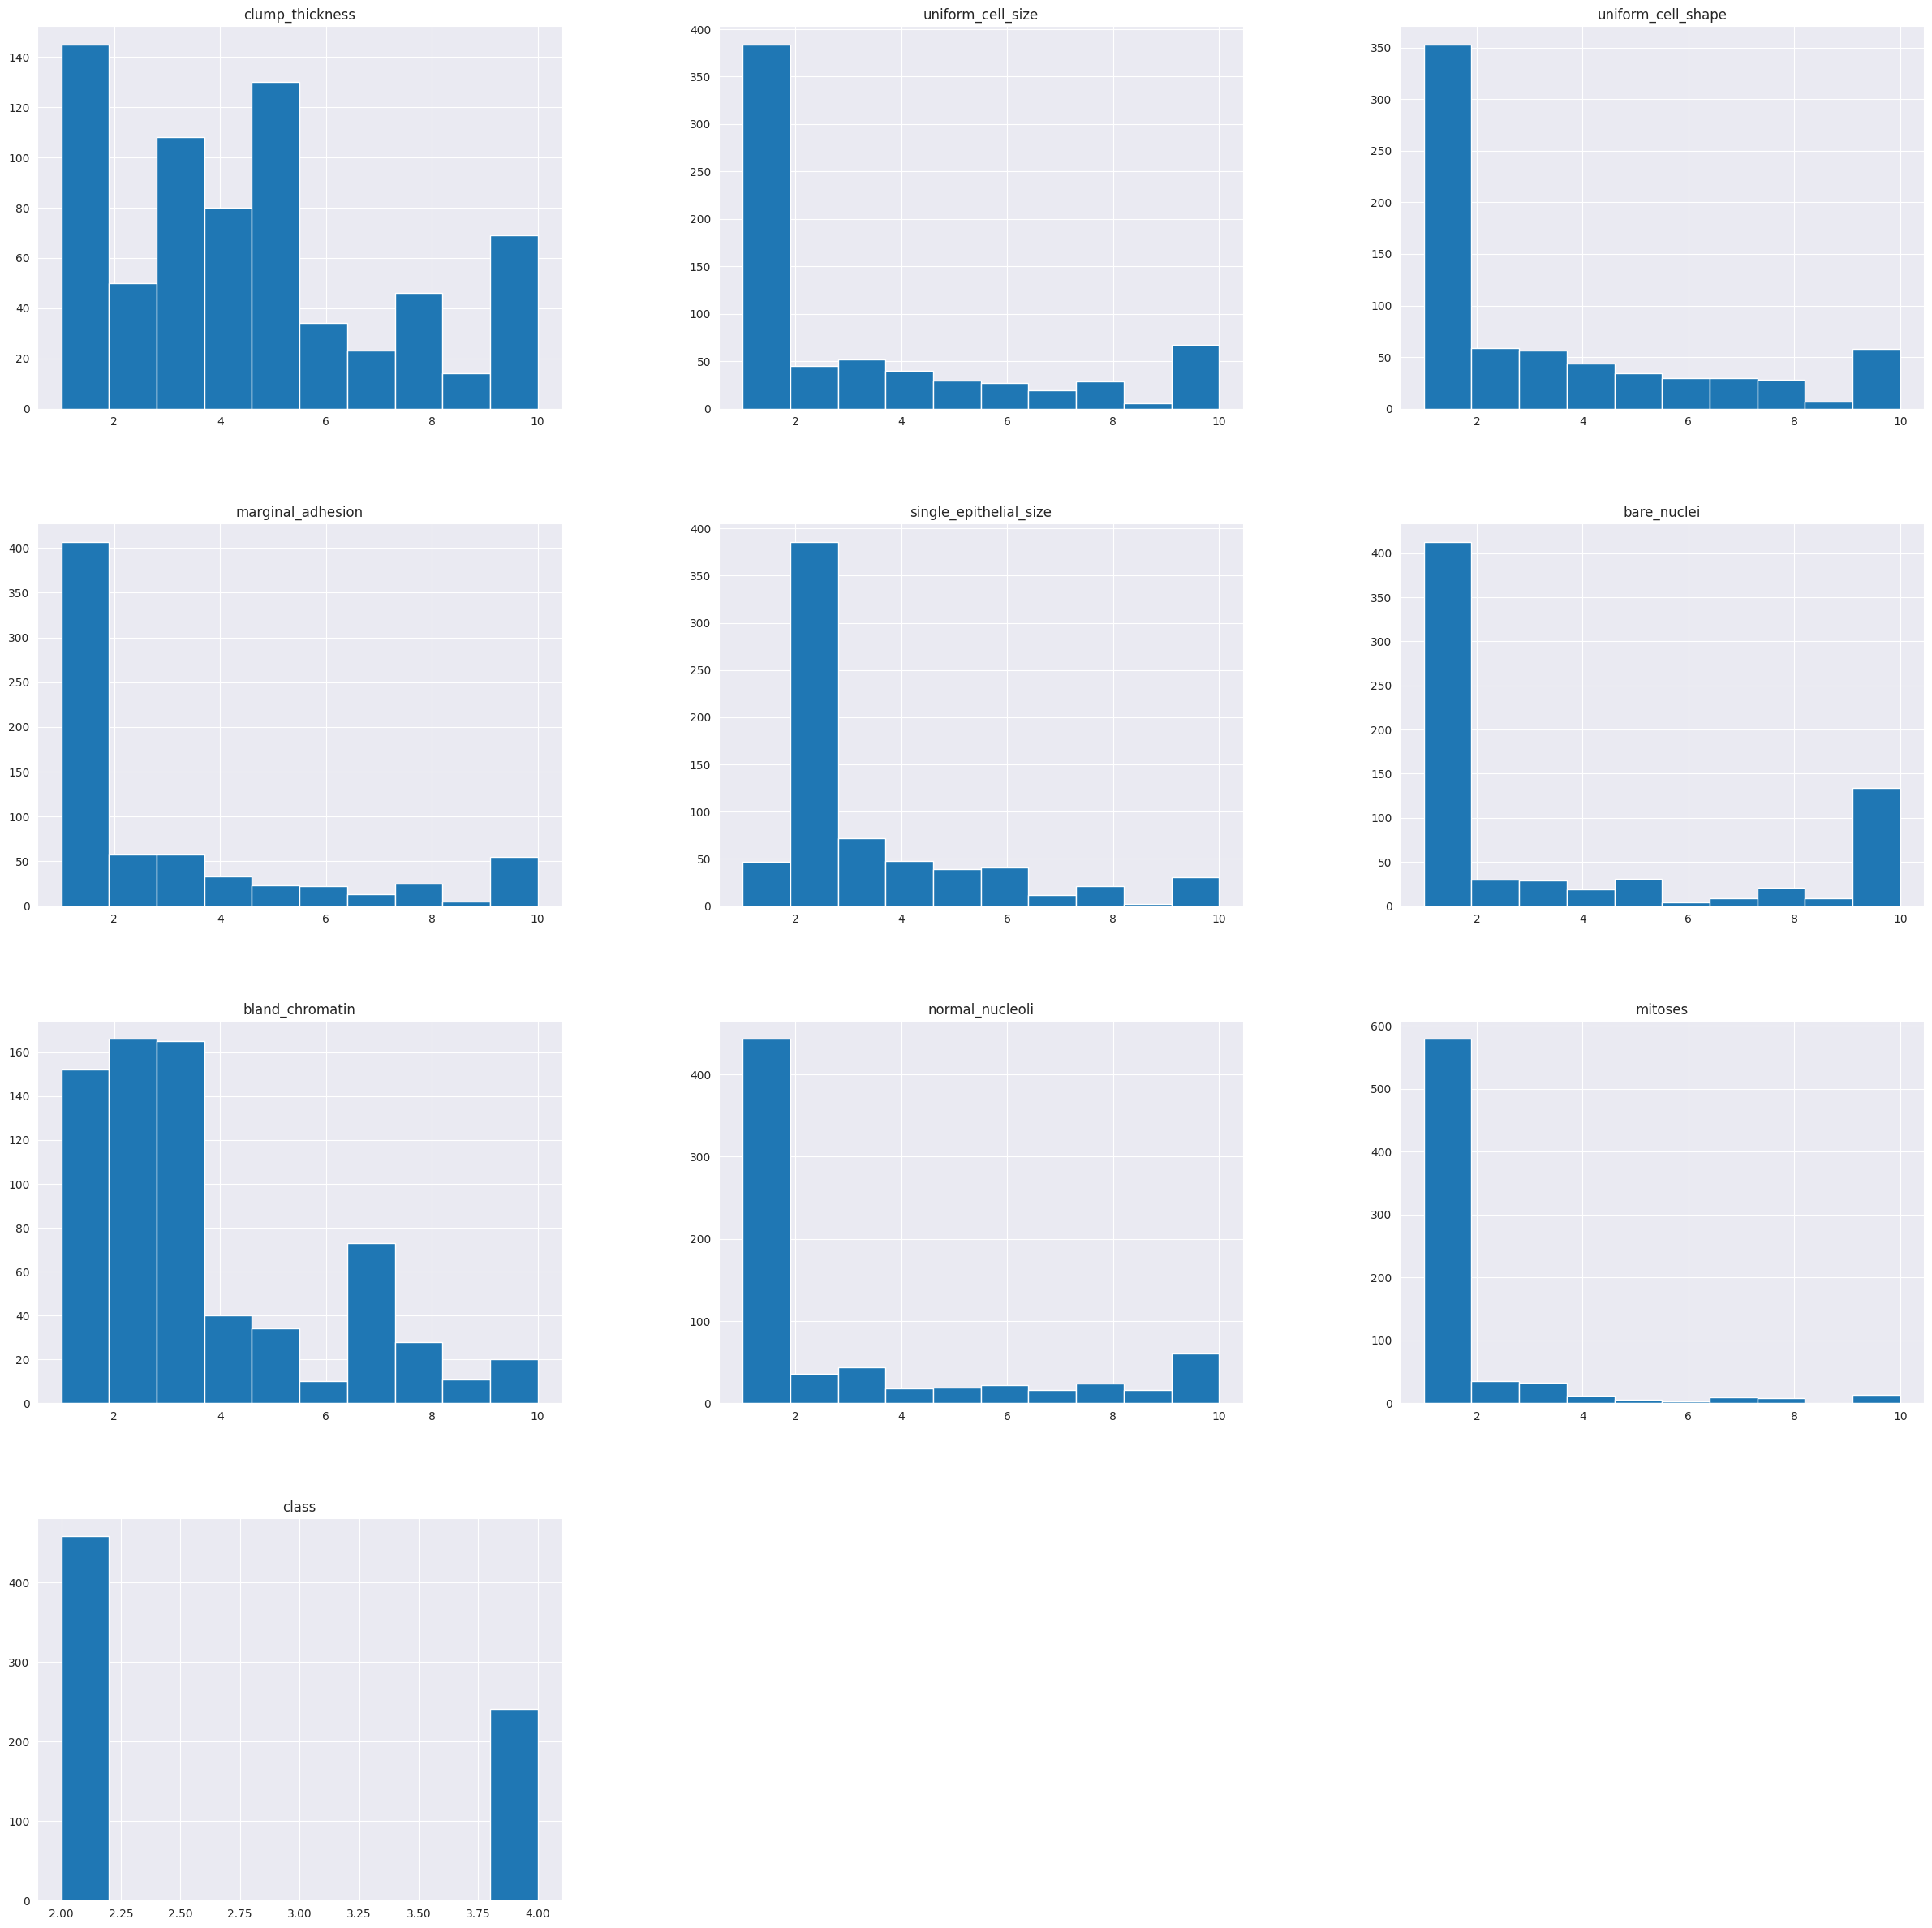

In [ ]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

from pandas.plotting import scatter_matrix

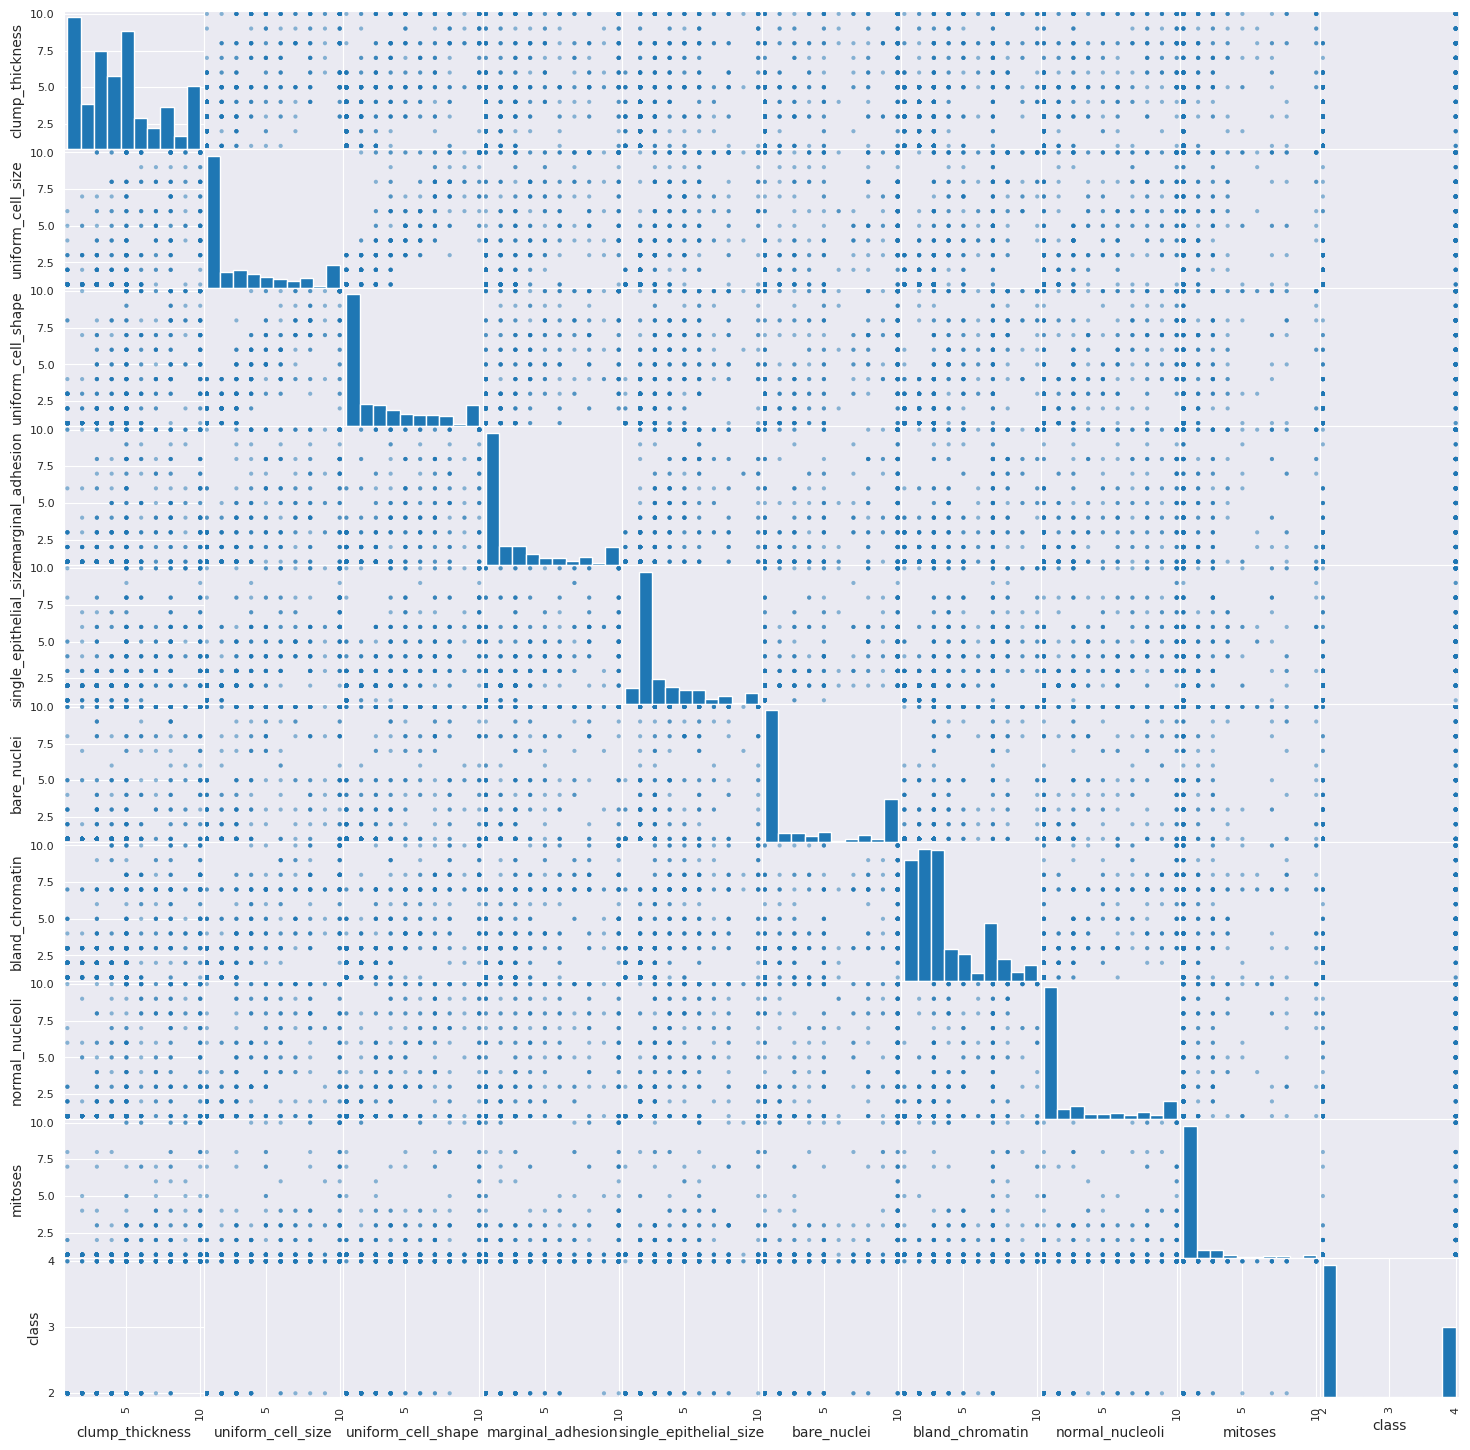

In [ ]:
from pandas.plotting import scatter_matrix
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

<Axes: >

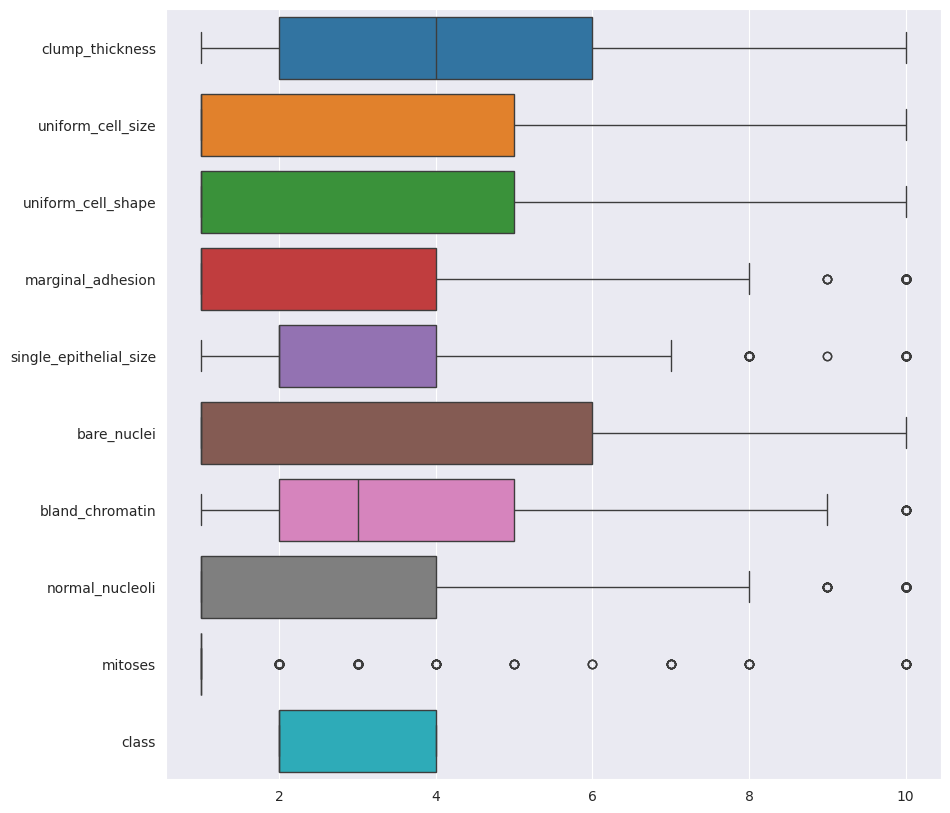

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

In [ ]:
df.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.583571,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.681309,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.701137,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.663669,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.579340,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.583571,0.681309,0.701137,0.663669,0.579340,1.000000,0.671398,0.571895,0.337078,0.807394
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671398,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.571895,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.337078,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.807394,0.756616,0.712244,0.423170,1.000000


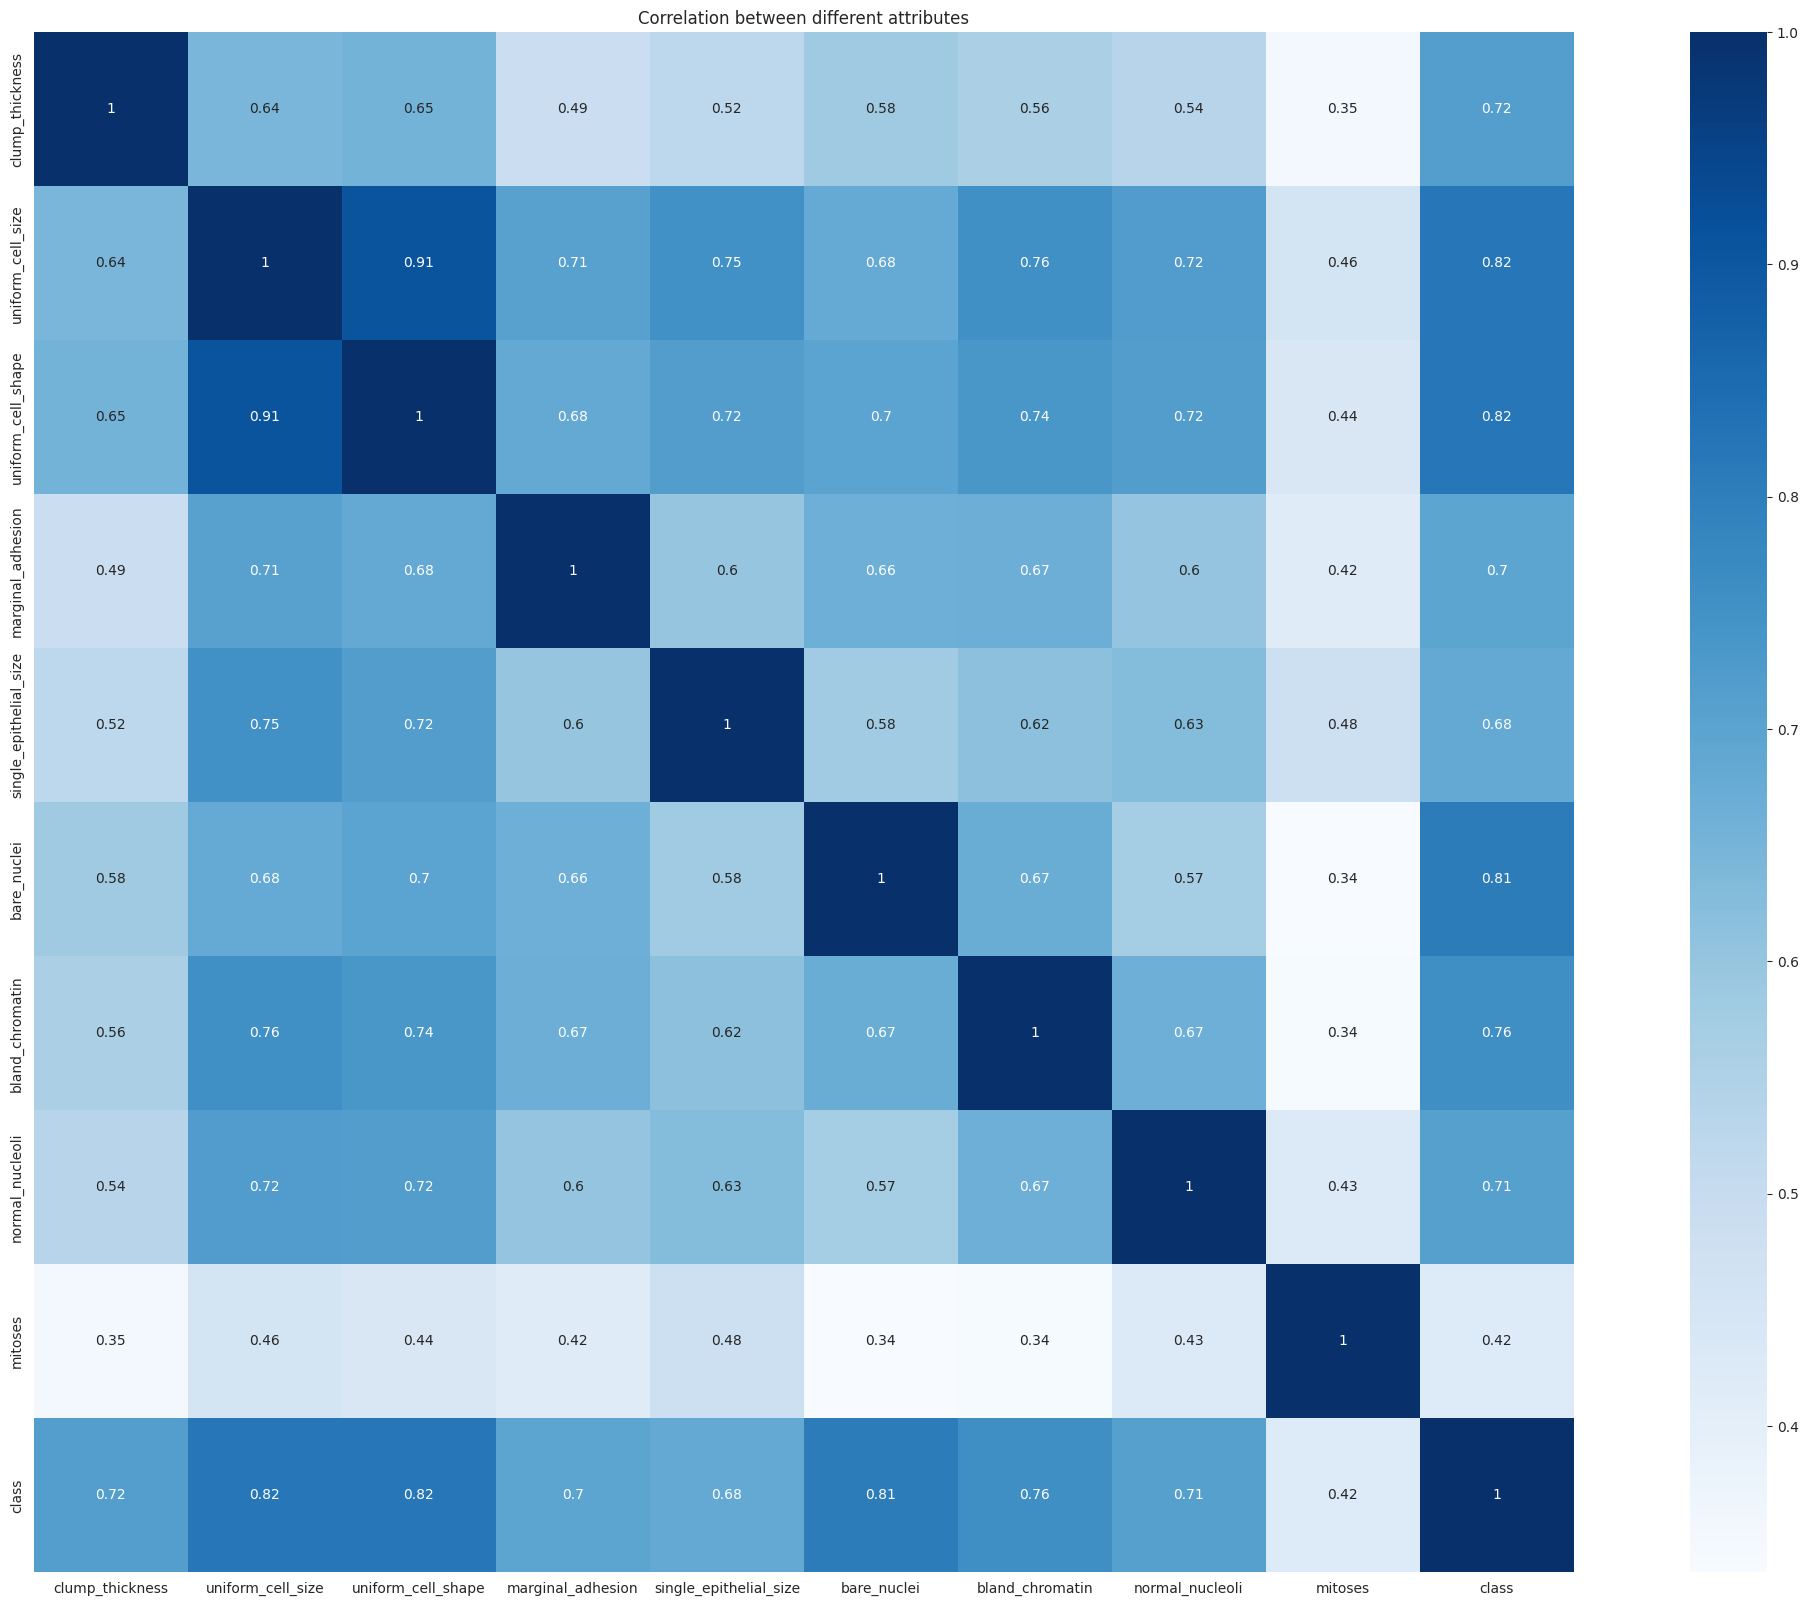

In [ ]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

clump_thickness           0.716001
uniform_cell_size         0.817904
uniform_cell_shape        0.818934
marginal_adhesion         0.696800
single_epithelial_size    0.682785
bare_nuclei               0.807394
bland_chromatin           0.756616
normal_nucleoli           0.712244
mitoses                   0.423170
class                     1.000000
Name: class, dtype: float64

In [ ]:
df.shape

(699, 10)

In [ ]:
df.columns

Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle

class CustomKMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            self.labels = self._assign_clusters(X)

            # Update centroids based on the mean of data points in each cluster
            new_centroids = self._update_centroids(X, self.labels)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return self.labels

    def _initialize_centroids(self, X):
        return X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

    def _assign_clusters(self, X):
        distances = np.sqrt(np.sum((X[:, np.newaxis] - self.centroids) ** 2, axis=2))
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)

        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[i] = X[np.random.choice(len(X))]

        return new_centroids

    def compute_wcss(self, X, labels):
        wcss = 0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                wcss += np.sum((cluster_points - self.centroids[i]) ** 2)
        return wcss

    def predict(self, X):
        X = np.array(X)  # Convert input to NumPy array
        return self._assign_clusters(X)

# Assuming df is your DataFrame containing the data
features = ['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses']
new_df = df[features]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(new_df.values)

# Perform dynamic k-means clustering for 2 clusters
n_clusters = 2
custom_kmeans = CustomKMeans(n_clusters=n_clusters)
labels = custom_kmeans.fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Save the scaler and the model using pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(custom_kmeans, model_file)

# Function to predict using the CustomKMeans model
def predict_tumor_type(new_data):
    # Load the scaler and model
    with open('scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)

    with open('model.pkl', 'rb') as model_file:
        custom_kmeans = pickle.load(model_file)

    new_data_scaled = scaler.transform(new_data)
    clusters = custom_kmeans.predict(new_data_scaled)
    return clusters

# Example usage:
# New data should be a 2D array where each row is a new sample
new_data = [[5,4,1,4,5,4,4,2,3]]  # Replace with actual new data
predictions = predict_tumor_type(new_data)
for i, prediction in enumerate(predictions):
    print(f'Sample {i+1}: Cluster {prediction}')


Sample 1: Cluster 0


In [ ]:
import pickle
import numpy as np

# Load the scaler and model from the file
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Function to predict using the model directly
def predict_with_model(input_data):
    # Ensure the input data is a NumPy array
    input_data = np.array(input_data)

    # Scale the input data using the same scaler
    scaled_data = scaler.transform(input_data)

    # Predict using the model
    return model.predict(scaled_data)

# Example usage
new_data = [[5, 4, 6, 4, 5, 33, 4, 2, 3], [2, 5, 2, 4, 1, 2, 2, 4, 5]]
predictions = predict_with_model(new_data)
for i, prediction in enumerate(predictions):
    print(f'Sample {i+1}: Cluster {prediction}')

Sample 1: Cluster 1
Sample 2: Cluster 0


In [ ]:
df
df.shape

(699, 11)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Extract 'Class' column from dx and 'Cluster' column from d
class_column1 = df['class']
cluster_column1 = df['Cluster']

# Create a new DataFrame
new_df1=pd.DataFrame({'class':class_column1,'Cluster':cluster_column1})
new_df1
new_df1['class_mapped'] = new_df1['class'].map({4: 1, 2: 0})
new_df1

,class,Cluster,class_mapped
0,2,0,0
1,2,1,0
2,2,0,0
3,2,1,0
4,2,0,0
...,...,...,...
694,2,0,0
695,2,0,0
696,4,1,1
697,4,1,1


In [ ]:
new_df1.iloc[5:20]

,class,Cluster,class_mapped
5,4,1,1
6,2,0,0
7,2,0,0
8,2,0,0
9,2,0,0
10,2,0,0
11,2,0,0
12,4,0,1
13,2,0,0
14,4,1,1


In [ ]:
new_df1.groupby('class').size()

class
2    458
4    241
dtype: int64

Confusion Matrix:
[[446  12]
 [ 22 219]]
Accuracy Score: 0.9513590844062947


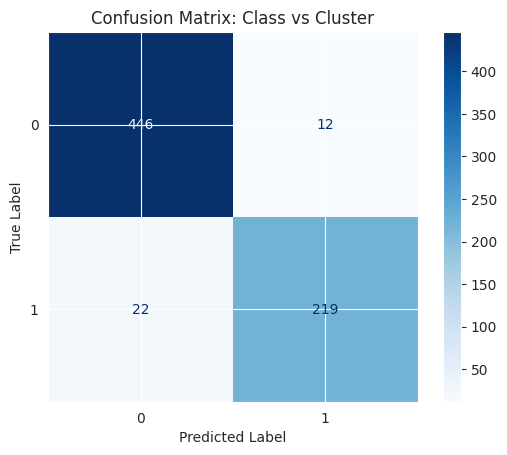

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract 'Class' and 'Cluster' columns
true_labels = new_df1['class_mapped']
predicted_labels = new_df1['Cluster']

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score:", accuracy)
# Create confusion matrix
conf_matrix = confusion_matrix(new_df1['class_mapped'], new_df1['Cluster'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Class vs Cluster')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
new_df1.iloc[0:20]

,class,Cluster,class_mapped
0,2,0,0
1,2,1,0
2,2,0,0
3,2,1,0
4,2,0,0
5,4,1,1
6,2,0,0
7,2,0,0
8,2,0,0
9,2,0,0
